# Assignment: Resampling Datetime Data
## Joseph Lim

Create a datetime index with the provided data and answer questions using visualizations and correct frequency data.

| Feature name     | Feature Type | Description                                   |
|------------------|--------------|-----------------------------------------------|
| date             | int          | recorded date of measurement                  |
| cloud_cover      | float        | cloud cover in oktas                          |
| sunshine         | float        | sunshine measurement in hours                 |
| global_radiation | float        | irradiance measurement in Watts/meter squared |
| max_temp         | float        | maximum temp in degrees Celsius               |
| mean_temp        | float        | average temp in degrees Celsius               |
| min_temp         | float        | minimum temp in degrees Clesius               |
| precipitation    | float        | precipitation measurement in millimeters      |
| pressure         | float        | pressure measurement in Pascals               |
| snow_depth       | float        | snow depth measured in centimeters            |

## Importing Libraries and Data

In [1]:
#Basic Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
#Setting various standards
plt.rcParams['figure.figsize'] = (12,3)

In [3]:
#importing data into dataframe
df = pd.read_csv("london_weather_MODIFIED - london_weather_MODIFIED.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Cleaning Data

Keep only data from the 2000s, as well as precipitation, temperature variables (min, max, etc.), and snow depth.

In [4]:
#Converting date to datetime dtype
df["date"] = df["date"].astype(str)

In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
drop_cols = ["cloud_cover", "sunshine", "global_radiation", "pressure"]
df = df.drop(columns = drop_cols)
df.head()

,date,max_temp,mean_temp,min_temp,precipitation,snow_depth
0,1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1,1979-01-02,1.6,-2.6,-7.5,0.0,8.0
2,1979-01-03,1.3,-2.8,-7.2,0.0,4.0
3,1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
4,1979-01-05,5.6,-0.8,-1.4,0.0,1.0


In [8]:
#Creating 2000s dataframe
filter_2000s = df["date"] >= "2000-01-01"
df_2000s = df[filter_2000s]
df_2000s.head()

,date,max_temp,mean_temp,min_temp,precipitation,snow_depth
7670,2000-01-01,10.8,7.0,4.9,0.0,0.0
7671,2000-01-02,11.5,7.9,5.0,0.2,0.0
7672,2000-01-03,9.5,9.4,7.2,6.0,0.0
7673,2000-01-04,11.0,7.0,4.4,0.2,0.0
7674,2000-01-05,10.8,6.4,1.9,0.8,0.0


In [9]:
df_2000s = df_2000s.set_index("date")
df_2000s.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [10]:
df_2000s.describe()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,15.810850,11.907308,8.000480,1.723376,0.023146
std,6.526161,5.669191,5.242933,3.675610,0.306467
min,-1.200000,-4.100000,-9.400000,0.000000,0.000000
25%,10.800000,7.600000,4.100000,0.000000,0.000000
50%,15.600000,11.800000,8.200000,0.000000,0.000000
75%,20.700000,16.400000,12.100000,1.800000,0.000000
max,37.900000,29.000000,22.300000,51.600000,12.000000


In [11]:
df_2000s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


### Data Imputation

Temperature data will be imputed via interpolation. Temperature does not usually stay steady throughout a timer period and then suddenly swing from one extreme to another that back or forward filling would do.

Precipitation and snow depth will be imputed via 0 filling. Precipitation tends to either fall or not fall, and does not lessen or increase in a linear manner.

In [12]:
#Checking % missing data
df_2000s.isna().sum() / len(df) * 100

max_temp          2.542207
mean_temp         2.731243
min_temp          2.516133
precipitation     2.542207
snow_depth       11.420377
dtype: float64

In [13]:
#Imputing missing temperature data
df_2000s["max_temp"] = df_2000s["max_temp"].interpolate()

df_2000s["min_temp"] = df_2000s["min_temp"].interpolate()

df_2000s["mean_temp"] = df_2000s["mean_temp"].interpolate()

In [14]:
#imputing missing precipitation and snow_depth data
df_2000s["precipitation"] = df_2000s["precipitation"].fillna(value = 0)

df_2000s["snow_depth"] = df_2000s["snow_depth"].fillna(value = 0)

In [15]:
#Checking % missing data
df_2000s.isna().sum() / len(df) * 100

max_temp         0.0
mean_temp        0.0
min_temp         0.0
precipitation    0.0
snow_depth       0.0
dtype: float64

In [16]:
df_2000s.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


## What month had the most precipitation between 2000 through 2010?

In [35]:
precipitation_df = df_2000s["precipitation"].to_frame()
precipitation_df.head()

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8


In [38]:
#Selecting only data from 2000-2010
precipitation_df = precipitation_df.loc["2000":"2010"]
print(precipitation_df.head(), precipitation_df.tail())

            precipitation
date                     
2000-01-01            0.0
2000-01-02            0.2
2000-01-03            6.0
2000-01-04            0.2
2000-01-05            0.8             precipitation
date                     
2010-12-27            5.0
2010-12-28            0.4
2010-12-29            1.4
2010-12-30            0.0
2010-12-31            0.0


In [39]:
#Getting total precipitation by month
precipitation_df = precipitation_df.resample("MS").sum()
precipitation_df.head()

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.4
2000-04-01,71.8
2000-05-01,68.4


In [95]:
max_precip = precipitation_df["precipitation"].idxmax()
max_precip

Timestamp('2009-11-01 00:00:00', freq='MS')

In [103]:
precipitation_df.loc[max_precip]

precipitation    138.4
Name: 2009-11-01 00:00:00, dtype: float64

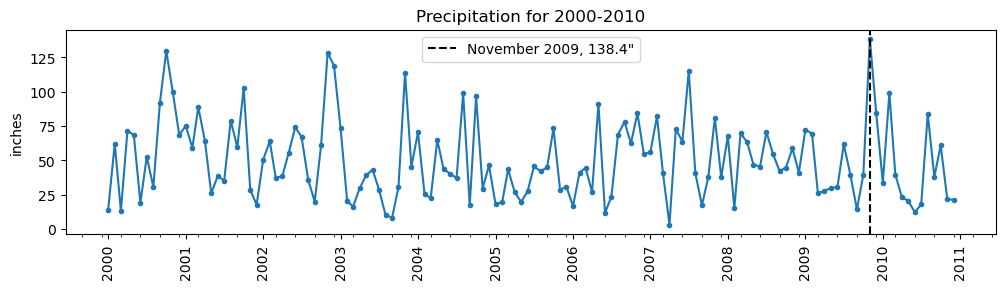

In [121]:
year_loc = mdates.YearLocator()
year_fmt = mdates.DateFormatter("%Y")

month_loc = mdates.MonthLocator(interval = 3)

#Plotting Data
fig, ax = plt.subplots()
ax.plot(precipitation_df.index, precipitation_df.values, marker = ".")

#Formatting major ticks
ax.xaxis.set_major_locator(year_loc)
ax.xaxis.set_major_formatter(year_fmt)
fig.autofmt_xdate(rotation=90,ha='center')

#Formatting minor ticks
ax.xaxis.set_minor_locator(month_loc)

#Setting vertical line to show maximum rainfall month
ax.axvline(max_precip, color = "black",label="November 2009, 138.4\"", ls = "--")

#Setting Labels
ax.set_ylabel("inches")
ax.set_title("Precipitation for 2000-2010")

ax.legend()

## Which year between 2000-2020 had the coolest average temperature?

In [125]:
cool_df = df_2000s["mean_temp"].to_frame()
cool_df.head()

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4


In [126]:
#Selecting only data from 2000-2010
cool_df = cool_df.loc["2000":"2020"]
print(cool_df.head(), cool_df.tail())

            mean_temp
date                 
2000-01-01        7.0
2000-01-02        7.9
2000-01-03        9.4
2000-01-04        7.0
2000-01-05        6.4             mean_temp
date                 
2020-12-27        7.5
2020-12-28        1.1
2020-12-29        2.6
2020-12-30        2.7
2020-12-31       -0.8


In [127]:
#Getting total precipitation by month
cool_df = cool_df.resample("YS").mean()
cool_df.head()

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


In [128]:
min_temp = cool_df["mean_temp"].idxmin()
min_temp

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

In [129]:
cool_df.loc[min_temp]

mean_temp    10.657397
Name: 2010-01-01 00:00:00, dtype: float64

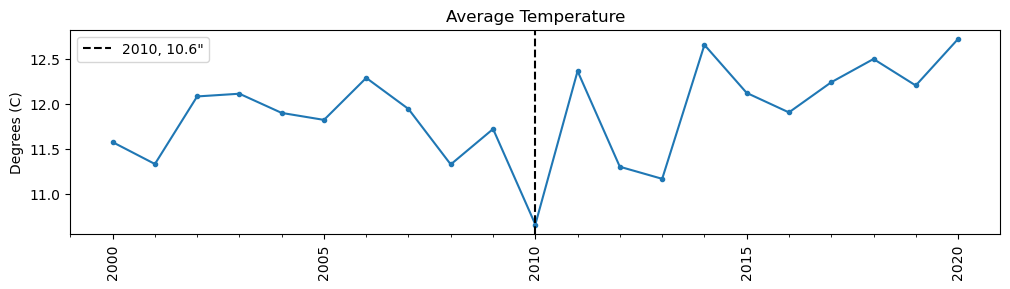

In [134]:
year_loc = mdates.YearLocator(5)
year_fmt = mdates.DateFormatter("%Y")

month_loc = mdates.YearLocator(1)

#Plotting Data
fig, ax = plt.subplots()
ax.plot(cool_df.index, cool_df.values, marker = ".")

#Formatting major ticks
ax.xaxis.set_major_locator(year_loc)
ax.xaxis.set_major_formatter(year_fmt)
fig.autofmt_xdate(rotation=90,ha='center')

#Formatting minor ticks
ax.xaxis.set_minor_locator(month_loc)

#Setting vertical line to show maximum rainfall month
ax.axvline(min_temp, color = "black",label="2010, 10.6\"", ls = "--")

#Setting Labels
ax.set_ylabel("Degrees (C)")
ax.set_title("Average Temperature")

ax.legend()